In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from statannot.statannot import add_stat_annotation


SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Models AUC

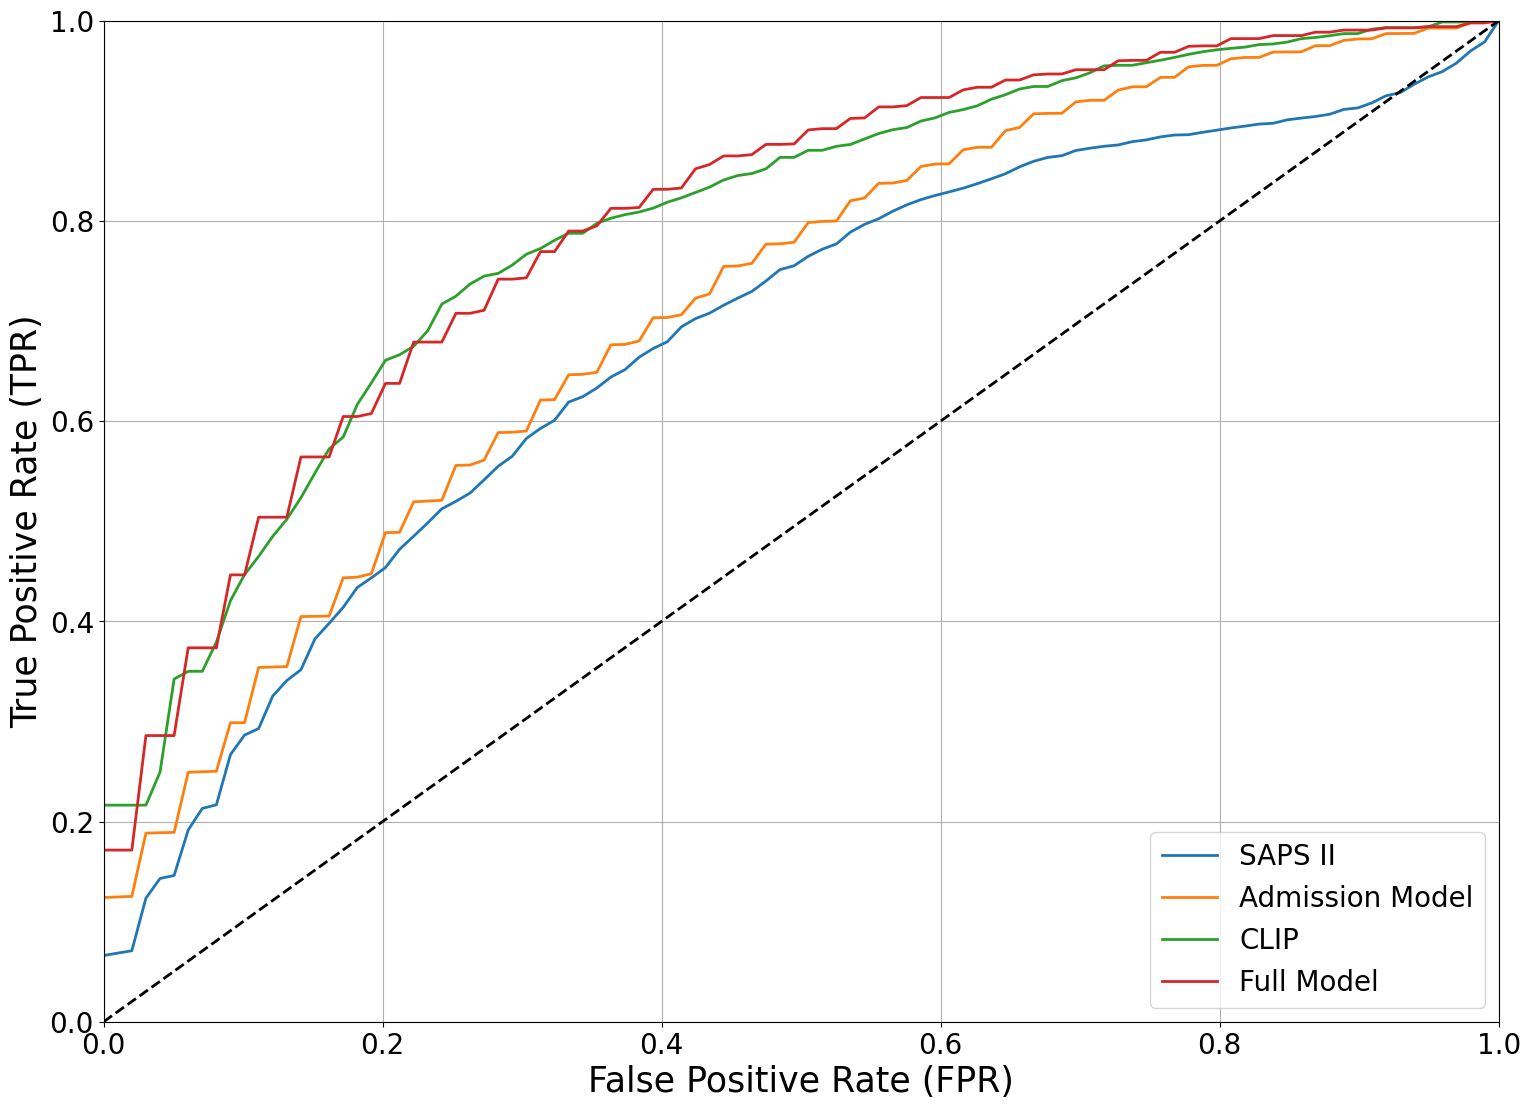

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd

root_dir_scores = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/predictions/v2/"
root_dir_admission = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
root_dir_full = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"

num_folds = 100
method_names = [["SAPS",root_dir_scores], 
                ["Admission",root_dir_admission], 
                ["CLIP",root_dir_scores],
                ["Full",root_dir_full]]

all_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(18, 13))

for method_name, root_dir in method_names:
    y_pred_all = pd.read_csv(root_dir+method_name+"_predictions.csv", index_col=0)
    y_true_all = pd.read_csv(root_dir+"y_true_"+method_name+".csv", index_col=0)
    # Initialize arrays to store accumulated TPR and FPR values
    mean_tpr = 0
    if method_name == "Admission":
        y_pred_all = y_pred_all.T
        y_true_all = y_true_all.T
    # Iterate through the folds for the current method
    for fold in y_pred_all.columns:
        y_pred = y_pred_all.loc[:,fold]
        y_pred.dropna(inplace=True)
        if method_name == "Admission":
            y_true = y_true_all.loc[:,(fold)]
        else:
            y_true = y_true_all.loc[:,str(fold)]
        y_true.dropna(inplace=True)

        # Calculate ROC curve for the current fold
        fpr, tpr, _ = roc_curve(y_true, y_pred)

        # Interpolate the TPR values to match the all_fpr values
        mean_tpr += np.interp(all_fpr, fpr, tpr)

    # Calculate the mean TPR across all folds for the current method
    mean_tpr /= num_folds

    # Calculate the AUC for the average ROC curve of the current method
    mean_auc = auc(all_fpr, mean_tpr)
    # Plot the average ROC curve for the current method
    plt.plot(all_fpr, mean_tpr, lw=2, label=f'{method_name} (AUC = {mean_auc:.2f})')


# Plot the chance level line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance Level')

# Add labels and legend
# plt.title('Average ROC Curve across Folds')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(["SAPS II", "Admission Model", "CLIP", "Full Model"],loc='lower right')
plt.grid(True)
plt.xlim([0,1])
plt.ylim([0,1])
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Show the plot
plt.show()

# Admission on CULPRIT

In [2]:
data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"

results_admission = pd.read_csv(data_dir + "Admission_random_remove.csv", index_col=0)
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"

results_24hs = pd.read_csv(data_dir + "Full_random_remove.csv", index_col=0)
results_24hs = results_24hs[results_24hs["Thresholds"] == 0.5]
results_24hs = results_24hs[results_24hs["Number of Removed Features"] == 0]


results_df = pd.concat([results_admission,results_24hs])

results_true_label = results_df[results_df["Random State"]== False]


models_to_plot = [
                "Full",
                  "Admission",
                #   "24hs",
                #   "SAPS_SCORE",
                #   "CLIP_SCORE", 
                  ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")



Full
Balanced ACC: 0.707 [0.592/0.822]
AUC: 0.799 [0.69/0.908]
F1: 0.633 [0.472/0.794]
Specificity: 0.817 [0.704/0.93]
Sensitivity: 0.597 [0.395/0.799]
Admission
Balanced ACC: 0.646 [0.531/0.761]
AUC: 0.715 [0.598/0.832]
F1: 0.618 [0.483/0.753]
Specificity: 0.687 [0.53/0.844]
Sensitivity: 0.605 [0.432/0.778]


# Random performance

p-value annotation legend:
ns: 1.00e-03 < p <= 1.00e+00
*p<0.001: p <= 1.00e-03

Full_False v.s. Full_True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.331e-59 U_stat=9.934e+04
Admission_False v.s. Admission_True: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.372e-51 U_stat=9.591e+04


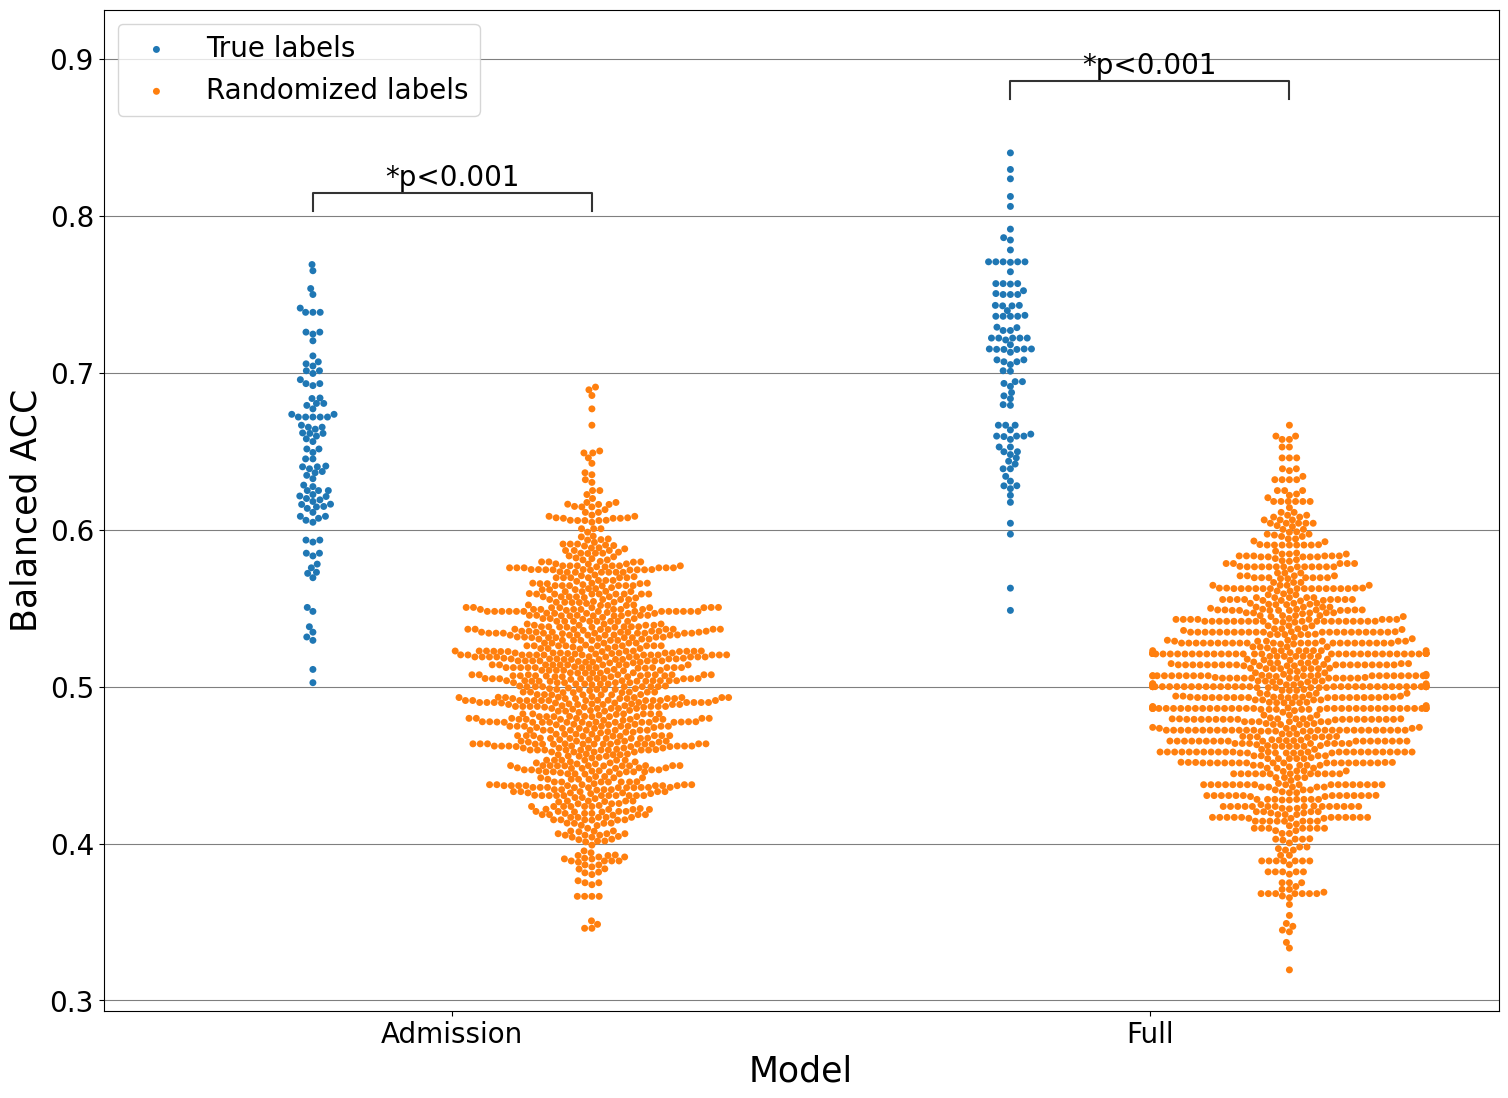

In [3]:
# Load OPTUNA DATA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/big_experiment/"

results_24hs_permuted = pd.read_csv(results_dir + "Full_permutation_test.csv")
results_24hs_permuted  = results_24hs_permuted[results_24hs_permuted["Thresholds"]==0.5]
results_24hs_permuted  = results_24hs_permuted[results_24hs_permuted["Number of Removed Features"]==0]
results_24hs_permuted = results_24hs_permuted.drop_duplicates(subset=['Fold', "Random Permutation Number"], keep='first')


results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"
results_full = pd.read_csv(results_dir + "Full_direct_remove.csv", index_col=0)
results_full = results_full[results_full["Thresholds"] == 0.5]
results_full = results_full[results_full["Number of Removed Features"] == 0]
results_full["Random State"] =  False

results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/optuna/big_experiment/"
results_admission_permuted = pd.read_csv(results_dir + "Admission_permutation_test.csv")
results_admission_permuted  = results_admission_permuted[results_admission_permuted["Thresholds"]==0.5]

results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"
results_admission = pd.read_csv(results_dir + "Admission_direct_remove.csv", index_col=0)

results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission["Random State"] =  False

models_to_plot = [
    "Admission",
    "Full", 
]

res = pd.concat([results_admission, results_admission_permuted, results_full,results_24hs_permuted])
metric_to_plot = "Balanced ACC"

fig, ax = plt.subplots(1, 1, figsize=[18, 13])

sns.swarmplot(
    data=res,
    x="Model", y=metric_to_plot,
    dodge=True, hue="Random State", ax=ax,
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:models_to_plot.__len__()], labels[:models_to_plot.__len__()])
ax.legend(["True labels", "Randomized labels"])

# Comparisons for statistical test
box_list = [
            (("Admission", True), ("Admission", False)),

            (("Full", True), ("Full", False)),

            ]


add_stat_annotation(ax, data=res, x="Model", y=metric_to_plot,
                    box_pairs=box_list, test='Mann-Whitney', hue="Random State",
                    text_format='star', loc='inside',
                    verbose=1,
                    pvalue_thresholds=[[1, "ns"], [0.001, "*p<0.001"]])

plt.grid(alpha=0.5, axis="y", c="black")


# Missing value experiment Admission Model

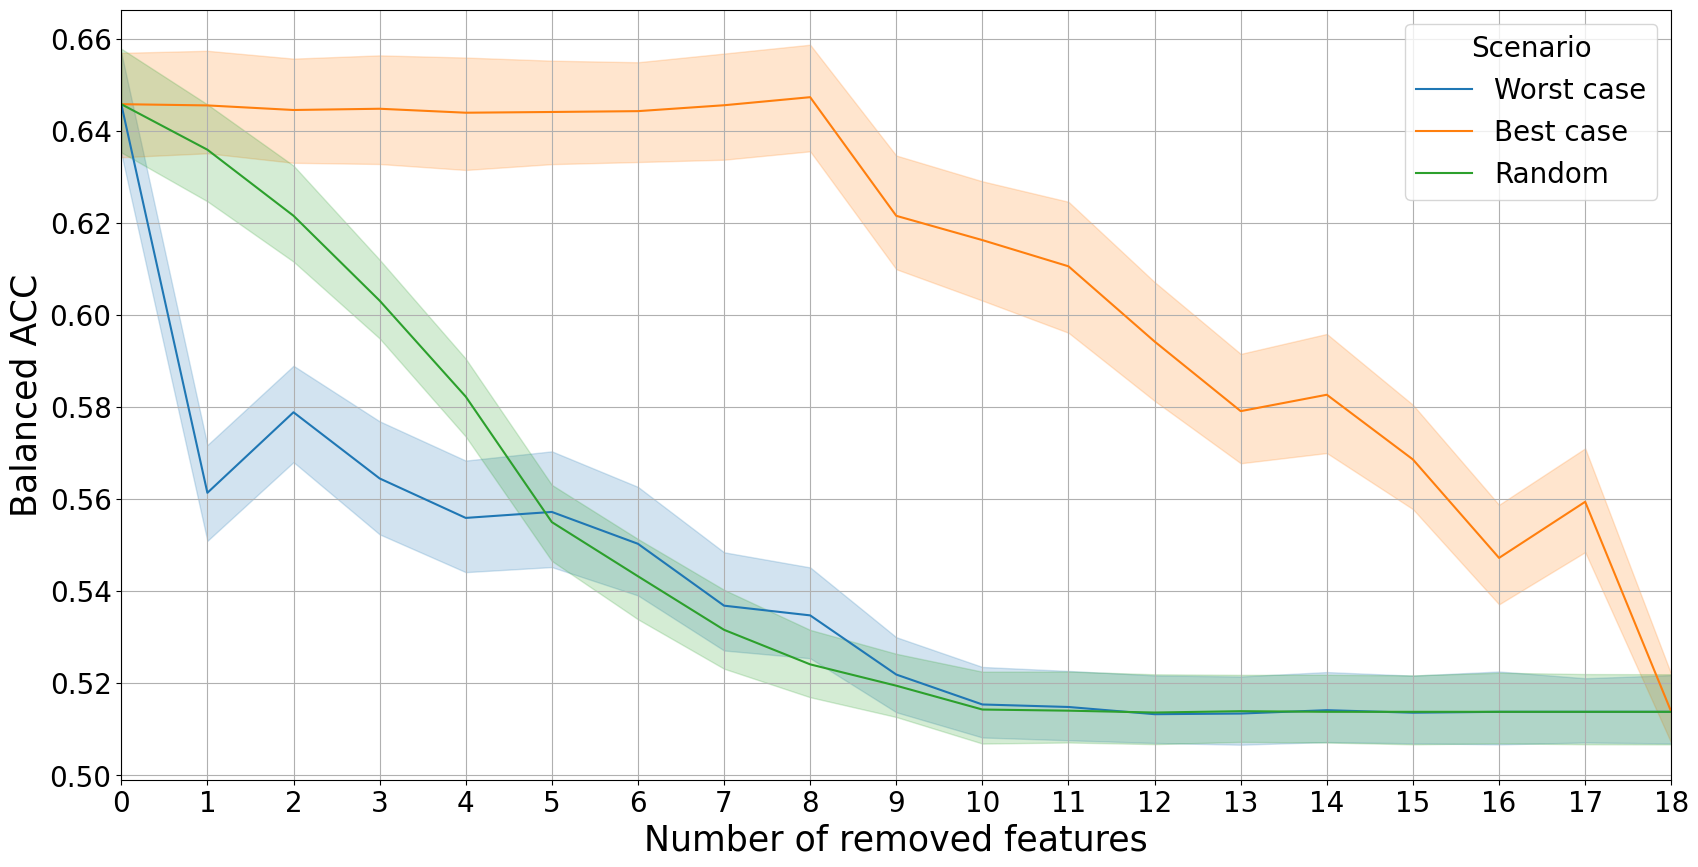

In [4]:

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/admission_model/"

results_random = pd.read_csv(data_dir + "Admission_random_remove.csv", index_col=0)
results_random = results_random[results_random["Thresholds"] == 0.5]
results_random["Scenario"] = "Random"

results_direct = pd.read_csv(data_dir + "Admission_direct_remove.csv", index_col=0)
results_direct = results_direct[results_direct["Thresholds"] == 0.5]
results_direct["Scenario"] = "Worst case"

results_inverse = pd.read_csv(data_dir + "Admission_inverse_remove.csv", index_col=0)

results_inverse = results_inverse[results_inverse["Thresholds"] == 0.5]
results_inverse["Scenario"] = "Best case"

# Reset index to avoid duplicates
results_random.reset_index(drop=True, inplace=True)
results_direct.reset_index(drop=True, inplace=True)
results_inverse.reset_index(drop=True, inplace=True)
results_mv = pd.concat([results_direct, results_inverse, results_random], ignore_index=True)


fig, ax = plt.subplots(1, 1, figsize=[20, 10])
metric_to_plot = "Balanced ACC"
results_mv_to_plot = results_mv[results_mv["Model"] == "Admission"]

sns.lineplot(
    data=results_mv_to_plot,
    x="Number of Removed Features", y=metric_to_plot,
    hue="Scenario", ax=ax
)
plt.grid()
plt.xlim(0,18)
plt.xlabel("Number of removed features")
custom_ticks = np.arange(0, 19, 1)  # Range from 0 to 1 with step of 0.1
plt.xticks(custom_ticks)
# plt.title("Missing values impact in 24hs Model")
plt.show()

# Missing value experiment Full Model

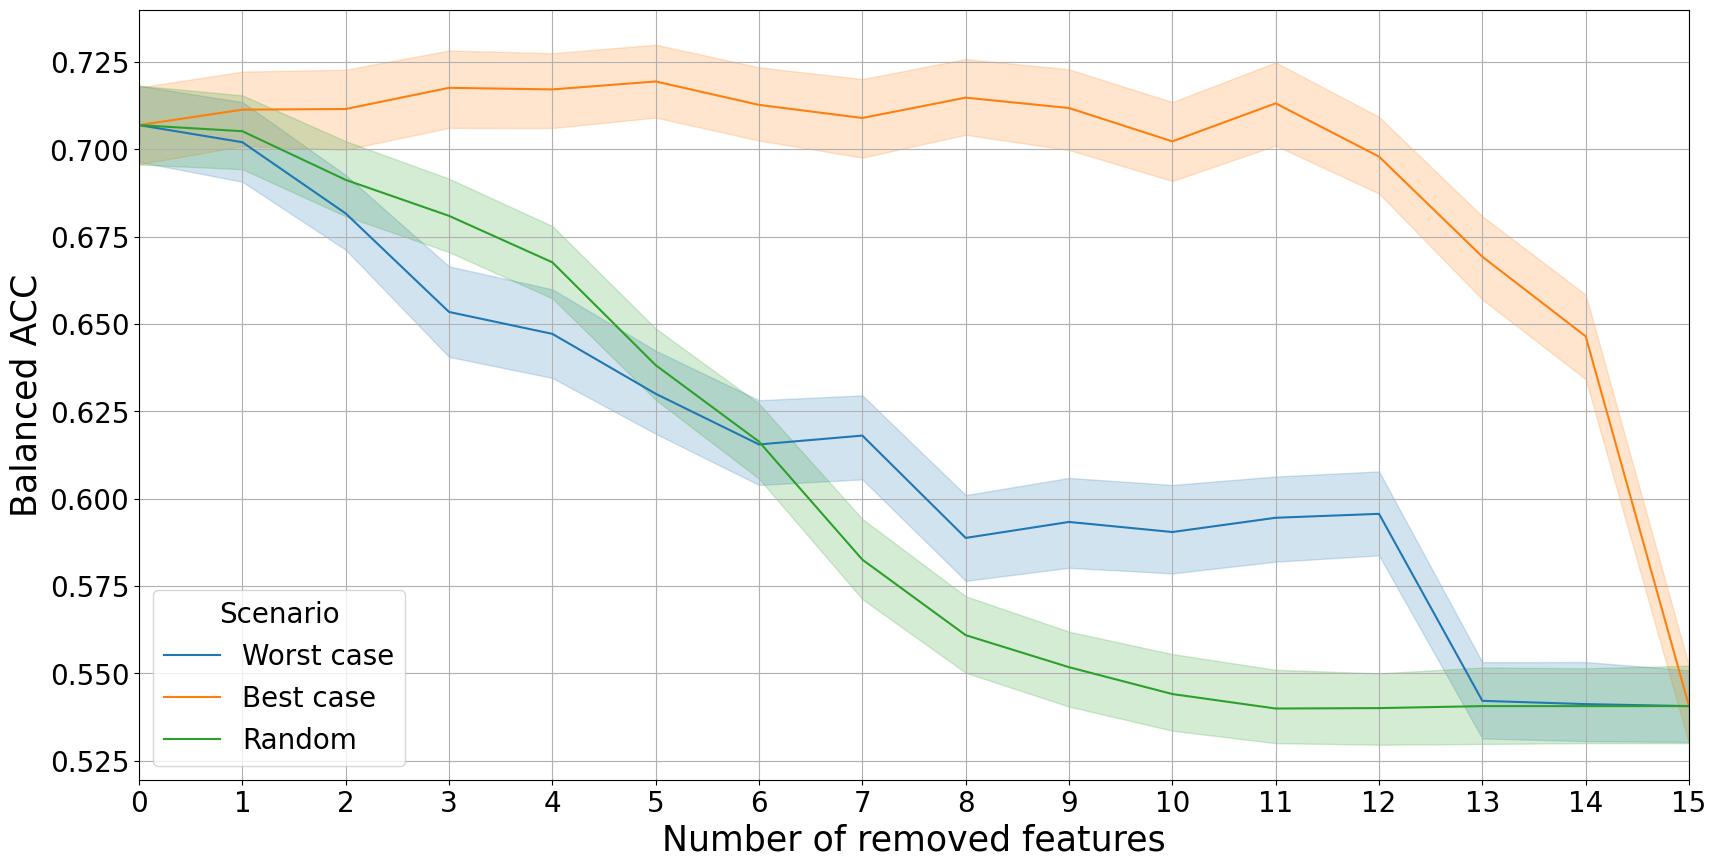

In [13]:

data_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/full_model/"

results_random = pd.read_csv(data_dir + "Full_random_remove.csv", index_col=0)
results_random = results_random[results_random["Thresholds"] == 0.5]
results_random["Scenario"] = "Random"

results_direct = pd.read_csv(data_dir + "Full_direct_remove.csv", index_col=0)
results_direct = results_direct[results_direct["Thresholds"] == 0.5]
results_direct["Scenario"] = "Worst case"

results_inverse = pd.read_csv(data_dir + "Full_inverse_remove.csv", index_col=0)

results_inverse = results_inverse[results_inverse["Thresholds"] == 0.5]
results_inverse["Scenario"] = "Best case"
# Reset index to avoid duplicates
results_random.reset_index(drop=True, inplace=True)
results_direct.reset_index(drop=True, inplace=True)
results_inverse.reset_index(drop=True, inplace=True)
results_mv = pd.concat([results_direct, results_inverse, results_random], ignore_index=True)



fig, ax = plt.subplots(1, 1, figsize=[20, 10])
metric_to_plot = "Balanced ACC"
results_mv_to_plot = results_mv[results_mv["Model"] == "Full"]

sns.lineplot(
    data=results_mv_to_plot,
    x="Number of Removed Features", y=metric_to_plot,
    hue="Scenario", ax=ax
)
plt.grid()
plt.xlim(0,15)
plt.xlabel("Number of removed features")
custom_ticks = np.arange(0, 16, 1)  # Range from 0 to 1 with step of 0.1
plt.xticks(custom_ticks)
# plt.title("Missing values impact in 24hs Model")
plt.show()

# CordShock Score 

In [6]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/CardSchock/"       # noqa

results_CardShock = pd.read_csv(results_dir + "CardShock.csv", index_col=0)
results_CardShock = results_CardShock[results_CardShock["Number of Removed Features"] == 0]
results_CardShock = results_CardShock[results_CardShock["Thresholds"] == 0.5]
results_CardShock.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)

results_true_label = pd.concat([results_CardShock])


models_to_plot = [
                  "CardShock_Score_test",
                  ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")


CardShock_Score_test
Balanced ACC: 0.567 [0.373/0.761]
AUC: 0.694 [0.418/0.97]
F1: 0.341 [-0.115/0.797]
Specificity: 0.807 [0.454/1.16]
Sensitivity: 0.328 [-0.196/0.852]


# Admission model performance on eICU dataset

In [13]:

results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/eICU/admission_model/"       # noqa

results_admission = pd.read_csv(results_dir + "Admission_performance_CULPRIT_eICU.csv", index_col=0)
results_admission = results_admission[results_admission["Number of Removed Features"] == 0]
results_admission = results_admission[results_admission["Thresholds"] == 0.5]
results_admission.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)

results_true_label = pd.concat([results_admission])


models_to_plot = [
                  "Admission Train (CULPRIT)",
                  "Admission Test (eICU)"
                  ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)

        print(metric + ": " + str(results_mean))


Admission Train (CULPRIT)
Balanced ACC: 0.712
AUC: 0.8
F1: 0.687
Specificity: 0.762
Sensitivity: 0.662
Admission Test (eICU)
Balanced ACC: 0.605
AUC: 0.63
F1: 0.523
Specificity: 0.678
Sensitivity: 0.531


# Full model performance on eICU dataset

In [30]:

results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/eICU/full_model/"       # noqa

results = pd.read_csv(results_dir + "Full_performance_CULPRIT_eICU.csv", index_col=0)
results.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)

results_true_label = pd.concat([results])


models_to_plot = [
                  "Full Train (CULPRIT)",
                  "Full test (eICU)"
                  ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)

        print(metric + ": " + str(results_mean))


Full Train (CULPRIT)
Balanced ACC: 0.892
AUC: 0.952
F1: 0.872
Specificity: 0.942
Sensitivity: 0.843
Full test (eICU)
Balanced ACC: 0.636
AUC: 0.769
F1: 0.493
Specificity: 0.886
Sensitivity: 0.385


# LG Admission performance

In [8]:
results_dir = "/home/nnieto/Nico/MODS_project/CULPRIT_project/output/review_1/LG_compare/LG_with_scaler/"       # noqa

results = pd.read_csv(results_dir + "LG_complete_data_admission.csv", index_col=0)
results = results[results["Model"] == "LG_complete_admission_test"]
results = results[results["Number of Removed Features"] == 0]
results = results[results["Thresholds"] == 0.5]
results.drop(columns=['Fold', 'Random State', 'Random Permutation Number',
       'Thresholds', 'Number of Removed Features', "Recall"], inplace=True)

results_true_label = pd.concat([results])


models_to_plot = [
                  "LG_complete_admission_test",
                  ]

metrics = ["Balanced ACC",
           "AUC",
           "F1",
           "Specificity",
           "Sensitivity"]

for model in models_to_plot:
    print(model)
    for metric in metrics:
        results_mean = round(results_true_label[results_true_label["Model"] == model][metric].mean(),3)
        results_std = round(results_true_label[results_true_label["Model"] == model][metric].std(),3)
        confidence_interval = stats.t.interval(0.95, len(results_true_label[results_true_label["Model"] == model][metric]) - 1, loc=results_mean, scale=results_std)

        print(metric + ": " + str(results_mean) + " ["+str(round(confidence_interval[0],3)) + "/" + str(round(confidence_interval[1],3))+"]")


LG_complete_admission_test
Balanced ACC: 0.669 [0.554/0.784]
AUC: 0.734 [0.615/0.853]
F1: 0.624 [0.487/0.761]
Specificity: 0.737 [0.562/0.912]
Sensitivity: 0.601 [0.418/0.784]
